In [1]:
# Cell 1: Check the Python environment used by Jupyter Notebook
import sys
print(sys.executable)

/home/rahmanm9/cnnt_venv/bin/python3


In [17]:
# Cell 1: Install the tqdm module
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install --upgrade jupyter
!{sys.executable} -m pip install --upgrade ipywidgets


  Obtaining dependency information for jupyter from https://files.pythonhosted.org/packages/83/df/0f5dd132200728a86190397e1ea87cd76244e42d39ec5e88efd25b2abd7e/jupyter-1.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for notebook from https://files.pythonhosted.org/packages/32/b4/b0cdaf52c35a3a40633136bee5152d6670acb555c698d23a3458dca65781/notebook-7.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for qtconsole from https://files.pythonhosted.org/packages/f2/3f/de5e5eb44900c1ed1c1567bc505e3b6e6f4c01cf29e558bf2f8cee29af5b/qtconsole-5.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-console from https://files.pythonhosted.org/packages/ca/77/71d78d58f15c22db16328a476426f7ac4a60d3a5a7ba3b9627ee2f7903d4/jupyter_console-6.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for nbconvert from https://files.pythonhosted.org/packages/b8/bb/bb5b6a515d1584aa2fd89965b11db6632e4bdc69495a52374bcc36e56cfa/nbconvert-7.16.4-

In [18]:
# Cell 4: Enable Jupyter widgets extension
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension --sys-prefix
!{sys.executable} -m jupyter nbextension install --py widgetsnbextension --sys-prefix


usage: jupyter.py [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
                  [--paths] [--json] [--debug]
                  [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter.py [-h] [--version] [--config-dir] [--data-dir] [--runtime-di

In [20]:
# Cell 1: Extract the tar.gz file with progress bar and save files in the same parent directory
import tarfile
from tqdm.notebook import tqdm
import os

# Path to your tar.gz file
tar_path = '/isilon/ai-data/PublicData/Nonprocessed/Denoising_Planaria.tar.gz'

# Get the parent directory of the tar.gz file
parent_dir = os.path.dirname(tar_path)

# Open the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    # Get the total number of files in the tar.gz for the progress bar
    total_files = len(tar.getmembers())
    print(total_files)
    # Extract the tar.gz file with a progress bar
    #with tqdm(total=total_files, desc="Extracting files") as pbar:
    for member in tar.getmembers():
        tar.extract(member, path=parent_dir)
        #pbar.update(1)

print("Extraction completed.")


90
Extraction completed.


In [25]:
# Cell 2: List all TIFF files in the extracted directory
import os

# Directory containing the extracted TIFF files
image_dir = '/isilon/ai-data/PublicData/Nonprocessed/Denoising_Planaria/train_data/'

# List all TIFF files in the directory
tiff_files = os.listdir(image_dir) #[f for f in os.listdir(image_dir) if f.endswith('.npz') or f.endswith('.tif')]

print("TIFF files found:", tiff_files)

TIFF files found: ['data_label.npz']


In [ ]:
# Cell 3: Load and display the first TIFF image and its shape
import tifffile as tiff
import matplotlib.pyplot as plt

# Check if there are any TIFF files
if tiff_files:
    # Load the first TIFF image
    image_path = os.path.join(image_dir, tiff_files[0])
    image = tiff.imread(image_path)
    
    # Display the shape of the image
    print("Shape of the image:", image.shape)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Microscopy Image')
    plt.show()
else:
    print("No TIFF files found in the extracted directory.")


In [3]:
!{sys.executable} -m pip install h5py

  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/af/26/f231ee425c8df93c1abbead3d90ea4a5ff3d6aa49e0edfd3b4c017e74844/h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.17.3 from https://files.pythonhosted.org/packages/d1/27/2a7bd6855dc717aeec5f553073a3c426b9c816126555f8e616392eab856b/numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 6.3 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [53]:
import h5py
import os
import numpy as np

def split_h5_file(input_file, output_dir, output_file1_name, output_file2_name):
    # Create the output directory if it does not exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Construct the full output file paths
    output_file1_path = os.path.join(output_dir, output_file1_name)
    output_file2_path = os.path.join(output_dir, output_file2_name)
    
    test_data = {}
    train_data = {}

    # Open the input HDF5 file in read mode
    with h5py.File(input_file, 'r') as infile:
        keys = list(infile.keys())

        # Determine the split index
        split_index = 25

        # Process top-level groups and datasets
        for i, key in enumerate(keys):
            item = infile[key]
            if isinstance(item, h5py.Group):
                if i < split_index:
                    test_data[key] = {}
                else:
                    train_data[key] = {}
                for subkey in item.keys():
                    subitem = item[subkey]
                    if isinstance(subitem, h5py.Dataset):
                        data = subitem[:]
                        if i < split_index:
                            test_data[key][subkey] = data
                            print(f"Added {key}/{subkey} to test_data")
                        else:
                            train_data[key][subkey] = data
                            print(f"Added {key}/{subkey} to train_data")
                    else:
                        print(f"Skipped {key}/{subkey} as it is not a dataset")
            elif isinstance(item, h5py.Dataset):
                data = item[:]
                if i < split_index:
                    test_data[key] = data
                    print(f"Added {key} to test_data")
                else:
                    train_data[key] = data
                    print(f"Added {key} to train_data")
            else:
                print(f"Skipped {key} as it is not a group or dataset")

    def save_data(outfile, data_dict):
        for key, data in data_dict.items():
            if isinstance(data, dict):
                group = outfile.create_group(key)
                save_data(group, data)
            else:
                if data.dtype.kind == 'U':  # Check if data type is Unicode string
                    data = np.array(data, dtype='S')  # Convert to byte string
                outfile.create_dataset(key, data=data)
                #print(f"Saved {key} to {outfile.filename}")

    # Save the split data into the new HDF5 files
    with h5py.File(output_file1_path, 'w') as outfile1:
        save_data(outfile1, test_data)
            
    with h5py.File(output_file2_path, 'w') as outfile2:
        save_data(outfile2, train_data)

# Usage example
root_dir = '/isilon/lab-xue/publications/CNNT_paper/data/micro_datasets_tvt_split/'
input_file = os.path.join(root_dir, 'Ryo_tile_new_train.h5')
output_file1_name = 'Ryo_tile_new_ft_train.h5'
output_file2_name = 'Ryo_tile_new_backbone_train.h5'

split_h5_file(input_file, root_dir, output_file1_name, output_file2_name)


Added Image_000/clean_im to test_data
Added Image_000/noisy_im to test_data
Added Image_001/clean_im to test_data
Added Image_001/noisy_im to test_data
Added Image_002/clean_im to test_data
Added Image_002/noisy_im to test_data
Added Image_003/clean_im to test_data
Added Image_003/noisy_im to test_data
Added Image_004/clean_im to test_data
Added Image_004/noisy_im to test_data
Added Image_005/clean_im to test_data
Added Image_005/noisy_im to test_data
Added Image_006/clean_im to test_data
Added Image_006/noisy_im to test_data
Added Image_007/clean_im to test_data
Added Image_007/noisy_im to test_data
Added Image_008/clean_im to test_data
Added Image_008/noisy_im to test_data
Added Image_009/clean_im to test_data
Added Image_009/noisy_im to test_data
Added Image_010/clean_im to test_data
Added Image_010/noisy_im to test_data
Added Image_011/clean_im to test_data
Added Image_011/noisy_im to test_data
Added Image_012/clean_im to test_data
Added Image_012/noisy_im to test_data
Added Image_

In [55]:
test_file = '/isilon/lab-xue/publications/CNNT_paper/data/micro_datasets_tvt_split/Ryo_tile_new_ft_train.h5'
# Open the input HDF5 file in read mode
with h5py.File(test_file, 'r') as test_data_new:
    print(len(test_data_new))
    print(test_data_new)
    print(test_data_new.keys())

25
<HDF5 file "Ryo_tile_new_ft_train.h5" (mode r)>
<KeysViewHDF5 ['Image_000', 'Image_001', 'Image_002', 'Image_003', 'Image_004', 'Image_005', 'Image_006', 'Image_007', 'Image_008', 'Image_009', 'Image_010', 'Image_011', 'Image_012', 'Image_013', 'Image_014', 'Image_015', 'Image_016', 'Image_017', 'Image_018', 'Image_019', 'Image_020', 'Image_021', 'Image_022', 'Image_023', 'Image_024']>


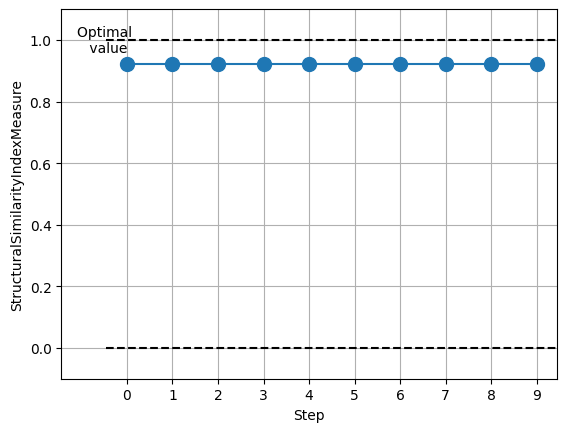

In [1]:
import torch
from torchmetrics.image import StructuralSimilarityIndexMeasure
preds = torch.rand([3, 3, 256, 256])
target = preds * 0.75
metric = StructuralSimilarityIndexMeasure(data_range=1.0)
values = [ ]
for _ in range(10):
    values.append(metric(preds, target))
fig_, ax_ = metric.plot(values)

In [3]:
import os
import time
import h5py
import numpy as np

root_dir = '/isilon/lab-xue/publications/CNNT_paper/data/micro_datasets_tvt_split/'
input_file = os.path.join(root_dir, 'Base_All_new_train.h5')
output_file = os.path.join('/home/rahmanm9/micro_datasets_tvt_split_float32/', 'Base_All_new_train.h5')

with h5py.File(input_file, 'r') as infile, h5py.File(output_file, 'w') as outfile:
    keys = list(infile.keys())
    
    # Start measuring time
    start_time = time.time()
    
    for key in keys:
        noisy_data = np.asarray(infile[key + "/noisy_im"], dtype=np.float32)
        clean_data = np.asarray(infile[key + "/clean_im"], dtype=np.float32)
        
        # Create groups and datasets in the output file
        grp = outfile.create_group(key)
        grp.create_dataset("noisy_im", data=noisy_data, dtype='float32')
        grp.create_dataset("clean_im", data=clean_data, dtype='float32')
    
    # End measuring time
    end_time = time.time()
    
    # Calculate and print elapsed time
    elapsed_time = end_time - start_time
    print(f"Time taken: {elapsed_time} seconds")

Default number of workers: 32
Number of CPU cores: 128
Time taken: 0.16501617431640625 seconds
